In [2]:
%%capture
!pip install pandas
#Import and configure the required modules.
# Define required imports
import pandas as pd
import numpy as np
import sys
import re
# These set pandas max column and row display in the notebook
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

### Reading Raw Data

In [14]:
%%capture
# Since the `DATE` column consists date-time information, we use Pandas parse_dates keyword for easier data processing

raw_data = pd.read_csv("jfk_weather.csv", parse_dates=['DATE'])

In [15]:
# Reda first couple rows of dataset with Pandas
raw_data.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYWindGustSpeed,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPressureChange,HOURLYSeaLevelPressure,HOURLYPrecip,...,MonthlyGreatestPrecip,MonthlyGreatestPrecipDate,MonthlyGreatestSnowfall,MonthlyGreatestSnowfallDate,MonthlyGreatestSnowDepth,MonthlyGreatestSnowDepthDate,MonthlyDaysWithGT90Temp,MonthlyDaysWithLT32Temp,MonthlyDaysWithGT32Temp,MonthlyDaysWithLT0Temp,MonthlyDaysWithGT001Precip,MonthlyDaysWithGT010Precip,MonthlyDaysWithGT1Snow,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureDate,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
0,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 00:51:00,FM-15,FEW:02 7 SCT:04 13 BKN:07 29,6.00,-RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79,33.0,0.6,32.0,0.1,31,-0.6,92.0,0.0,000,NaN,29.97,8.0,NaN,29.99,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
1,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 01:00:00,FM-12,NaN,5.59,||PL:79,33.0,0.6,32.0,0.1,31,-0.6,92.0,0.0,000,NaN,29.96,8.0,+0.05,29.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
2,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 01:51:00,FM-15,FEW:02 6 SCT:04 13 OVC:08 35,6.00,-RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79,33.0,0.6,33.0,0.3,32,0.0,96.0,0.0,000,NaN,29.97,NaN,NaN,29.99,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
3,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 02:03:00,FM-16,FEW:02 6 SCT:04 13 OVC:08 35,6.00,-RA:02 BR:1 |RA:61 |RA:61,34.0,1.0,33.0,0.7,32,0.0,93.0,0.0,000,NaN,29.97,NaN,NaN,NaN,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
4,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,3.4,40.6386,-73.7622,2010-01-01 02:28:00,FM-16,BKN:07 7 BKN:07 15 OVC:08 35,5.00,-RA:02 BR:1 |RA:61 |RA:61,34.0,1.0,33.0,0.7,32,0.0,93.0,0.0,000,NaN,29.97,NaN,NaN,NaN,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Looking at types of each column
raw_data.dtypes

STATION                               object
STATION_NAME                          object
ELEVATION                            float64
LATITUDE                             float64
LONGITUDE                            float64
                                      ...   
MonthlyTotalCoolingDegreeDays         object
MonthlyDeptFromNormalHeatingDD        object
MonthlyDeptFromNormalCoolingDD        object
MonthlyTotalSeasonToDateHeatingDD    float64
MonthlyTotalSeasonToDateCoolingDD    float64
Length: 90, dtype: object

## Clean Data

As you can see above, there are a lot of fields which are non-numerical - usually these will be fields that contain text or categorical data, ex: HOURLYSKYCONDITIONS.

There are also fields - such as the main temperature field of interest HOURLYDRYBULBTEMPF - that we expect to be numerical, but show up as object type. This often indicates that there may be missing (or null) values, or some other unusual readings that we may have to deal with (since otherwise the field would have parsed as a numerical data type).

In addition, some fields relate to hourly observations, while others relate to daily or monthly intervals. For purposes of later exploratory data analysis, we will restrict the dataset to a certain subset of numerical fields that relate to hourly observations.

Refer to the NOAA Local Climatological Data Documentation to describe the fields and meaning of various values.

In [28]:
# Select necessary columns to import from raw data
column_subset = [
    'DATE',
    'HOURLYVISIBILITY',
    'HOURLYDRYBULBTEMPF',
    'HOURLYWETBULBTEMPF',
    'HOURLYDewPointTempF',
    'HOURLYRelativeHumidity',
    'HOURLYWindSpeed',
    'HOURLYWindDirection',
    'HOURLYStationPressure',
    'HOURLYPressureTendency',
    'HOURLYSeaLevelPressure',
    'HOURLYPrecip',
    'HOURLYAltimeterSetting'
]

# Filter dataset to relevant columns
hourly_data = raw_data[column_subset]

# Set date 

# Take date column of dataframe and convert to DatetimeIndex and makes it the index
hourly_data = hourly_data.set_index(pd.DatetimeIndex(hourly_data['DATE']))

# Drop original date col otherwise it would be redundant
hourly_data.drop(['DATE'], axis=1, inplace=True)

# Replaces missing data with NaN so it allows for numeric conversion, aggregation, etc
hourly_data.replace(to_replace='*', value=np.nan, inplace=True)

# Show first couple rows
hourly_data.head()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
DATE,,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33.0,32.0,31,92.0,0.0,000,29.97,8.0,29.99,0.01,29.99
2010-01-01 01:00:00,5.59,33.0,32.0,31,92.0,0.0,000,29.96,8.0,29.99,NaN,NaN
2010-01-01 01:51:00,6.00,33.0,33.0,32,96.0,0.0,000,29.97,NaN,29.99,0.02,29.99
2010-01-01 02:03:00,6.00,34.0,33.0,32,93.0,0.0,000,29.97,NaN,NaN,T,29.99
2010-01-01 02:28:00,5.00,34.0,33.0,32,93.0,0.0,000,29.97,NaN,NaN,T,29.99


In [25]:
hourly_data.dtypes

HOURLYVISIBILITY           object
HOURLYDRYBULBTEMPF         object
HOURLYWETBULBTEMPF         object
HOURLYDewPointTempF        object
HOURLYRelativeHumidity     object
HOURLYWindSpeed            object
HOURLYWindDirection        object
HOURLYStationPressure      object
HOURLYPressureTendency    float64
HOURLYSeaLevelPressure     object
HOURLYPrecip               object
HOURLYAltimeterSetting     object
dtype: object

### Clean up precipitation column
From the dataframe preview above, we can see that the column HOURLYPrecip - which is the hourly measure of precipitation levels - contains both NaN and T values. T specifies trace amounts of precipitation, while NaN means not a number, and is used to denote missing values.

We can also inspect the unique values present for the field.

In [26]:
hourly_data['HOURLYPrecip'].unique()

array(['0.01', nan, '0.02', 'T', '0.00', '0.10', '0.07', '0.03', '0.05',
       '0.15', '0.06', '0.08', '0.04', '0.09', '0.11', '0.20', '0.13',
       '0.14', '0.05s', '0.12', '0.24', '0.02s', '0.17', '0.16', '0.47',
       '0.28', '0.32', '0.19', '0.22', '0.18', '0.26', '0.23', '0.30',
       '0.33', '0.04s', '0.36', '0.40', '0.41', '0.51', '0.50', '0.68s',
       '0.21', '0.35', '0.54', '0.01s', '0.34', '0.94', '1.14', '1.18',
       '1.15', '0.65', '0.74', '0.39', '0.67', '0.29', '0.46', '0.87',
       '1.10', '0.52', '0.08s', '0.37', '0.42', '0.03s', '0.09s', '0.11s',
       '0.10s', '0.25', '0.33s', '0.13s', '0.38', '0.64s', '0.06s',
       '0.17s', '0.69s', '0.73', '2.41', '0.57', '0.84', '0.86', '0.27',
       '0.60', '0.45', '0.75', '1.26', '0.59', '0.68', '0.79', '0.70',
       '0.44', '0.43', '0.53', '0.37s', '0.77', '0.85', '0.93', '0.55',
       '0.56', '1.52', '1.05', '1.76', '0.07s', '0.63', '1.19', '0.12s',
       '0.18s', '0.58', '0.48', '0.66', '0.29s', '0.71', '0.20s'

We can see that some values end with an s (indicating snow), while there is a strange value 0.020.01s which appears to be an error of some sort. To deal with T values, we will set the observation to be 0. We will also replace the erroneous value 0.020.01s with NaN.


In [30]:
%%capture
# Fix imported data
hourly_data['HOURLYPrecip'].replace(to_replace='T', value='0.00', inplace=True)
hourly_data['HOURLYPrecip'].replace('0.020.01s', np.nan, inplace=True)

### Convert columns to numerical types
Next, we will convert string columns that refer to numerical values to numerical types. For columns such as HOURLYPrecip, we first also drop the non-numerical parts of the value (the s character).

In [32]:
# Set of columns to convert
messy_columns = column_subset[1:]

# Convert columns to float32 datatype
for i in messy_columns:
    hourly_data[i] = hourly_data[i].apply(lambda x: re.sub('[^0-9,.-]', '', x) if type(x) == str else x).replace('', np.nan).astype(('float32'))

We can now see that all fields have numerical data type.



In [33]:
print(hourly_data.info())
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        96464 non-null   float32
 1   HOURLYDRYBULBTEMPF      111403 non-null  float32
 2   HOURLYWETBULBTEMPF      111245 non-null  float32
 3   HOURLYDewPointTempF     111395 non-null  float32
 4   HOURLYRelativeHumidity  111395 non-null  float32
 5   HOURLYWindSpeed         111358 non-null  float32
 6   HOURLYWindDirection     110444 non-null  float32
 7   HOURLYStationPressure   111256 non-null  float32
 8   HOURLYPressureTendency  48038 non-null   float32
 9   HOURLYSeaLevelPressure  99522 non-null   float32
 10  HOURLYPrecip            79762 non-null   float32
 11  HOURLYAltimeterSetting  86878 non-null   float32
dtypes: float32(12)
memory usage: 6.1 MB
None


,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
DATE,,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,29.99,0.01,29.99
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,0.0,29.959999,8.0,29.99,NaN,NaN
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,NaN,29.99,0.02,29.99
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,NaN,NaN,0.00,29.99
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,NaN,NaN,0.00,29.99


### Reformat and process data
Next, we will clean up some of the data columns to ensure their values fall within the parameters defined by the NOAA documentation (referred to above).


In [34]:
# Generate the summary statistics for each column
hourly_data.describe()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
count,96464.000000,111403.000000,111245.000000,111395.000000,111395.000000,111358.000000,110444.000000,111256.000000,48038.000000,99522.000000,79762.000000,86878.000000
mean,8.758805,55.310612,49.703098,43.309196,67.132141,11.268045,192.511597,29.990641,4.388963,30.026194,0.007032,30.009533
std,2.742651,17.169744,16.062113,19.357059,20.278572,6.175006,107.606514,0.238452,2.741795,0.233693,0.042636,0.239821
min,0.000000,1.000000,-1.000000,-22.000000,8.000000,0.000000,0.000000,28.490000,0.000000,28.540001,0.000000,28.510000
25%,9.940000,42.000000,37.000000,29.000000,51.000000,7.000000,110.000000,29.850000,2.000000,29.879999,0.000000,29.870001
50%,10.000000,56.000000,50.000000,45.000000,69.000000,10.000000,200.000000,29.990000,5.000000,30.020000,0.000000,30.010000
75%,10.000000,70.000000,64.000000,60.000000,85.000000,15.000000,280.000000,30.139999,7.000000,30.170000,0.000000,30.160000
max,99.419998,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,8.000000,30.850000,2.410000,30.850000


According to the documentation, the HOURLYPressureTendency field should be an integer value in the range [0, 8]. Let's check if this condition holds for this dataset.



In [35]:
# Check if categorical variable HOURLYPressureTendency ever has a non-integer entry outside the bounds of 0-8
cond = len(hourly_data[~hourly_data['HOURLYPressureTendency'].isin(list(range(0,9)) + [np.nan])])
print('Hourly Pressure Tendency should be between 0 and 8: {}'.format(cond == 0))

Hourly Pressure Tendency should be between 0 and 8: True


The HOURLYVISIBILITY should be an integer in the range [0, 10]. Let's check this condition too.

In [36]:
# Hourly Visibility should be between 0 and 10
hourly_data[(hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)]

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
DATE,,,,,,,,,,,,
2011-10-16 11:51:00,14.000000,68.0,53.0,37.0,33.0,16.0,250.0,29.85,NaN,NaN,NaN,29.870001
2015-06-21 17:45:00,99.419998,79.0,72.0,68.0,70.0,37.0,310.0,29.74,NaN,NaN,0.0,29.760000


We find that a couple of observations fall outside the range. These must be spurious data observations and we handle them by replacing them with NaN.

In [37]:
# Replace any hourly visibility figure outside these bounds with nan
hourly_data.loc[hourly_data['HOURLYVISIBILITY'] > 10, 'HOURLYVISIBILITY'] = np.nan

# Hourly Visibility should be between 0 and 10
cond = len(hourly_data[(hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)])
print('Hourly Visibility should be between 0 and 10: {}'.format(cond == 0))

Hourly Visibility should be between 0 and 10: True


Finally, we check if there are any duplicates with respect to our DATE index and check furthermore that our dates are in the correct order (that is, strictly increasing).

In [38]:
cond = len(hourly_data[hourly_data.index.duplicated()].sort_index())
print('Date index contains no duplicate entries: {}'.format(cond == 0))

Date index contains no duplicate entries: True


In [39]:
# Make sure time index is sorted and increasing
print('Date index is strictly increasing: {}'.format(hourly_data.index.is_monotonic_increasing))

Date index is strictly increasing: True


In [40]:
hourly_data.reset_index(inplace=True)

In [41]:
hourly_data.columns


Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting'],
      dtype='object')

We will now also replace missing values. For numerical values, we will linearly interpolate between the previous and next valid obvservations. For the categorical HOURLYPressureTendency field, we will replace missing values with the last valid observation.

In [42]:
%%capture
hourly_data['HOURLYPressureTendency'] = hourly_data['HOURLYPressureTendency'].fillna(method='ffill') # fill with last valid observation
hourly_data = hourly_data.interpolate(method='linear') # interpolate missing values
hourly_data.drop(hourly_data.index[0], inplace=True) # drop first row

In [43]:
print(hourly_data.info())
print()
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114544 entries, 1 to 114544
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    114544 non-null  datetime64[ns]
 1   HOURLYVISIBILITY        114544 non-null  float32       
 2   HOURLYDRYBULBTEMPF      114544 non-null  float32       
 3   HOURLYWETBULBTEMPF      114544 non-null  float32       
 4   HOURLYDewPointTempF     114544 non-null  float32       
 5   HOURLYRelativeHumidity  114544 non-null  float32       
 6   HOURLYWindSpeed         114544 non-null  float32       
 7   HOURLYWindDirection     114544 non-null  float32       
 8   HOURLYStationPressure   114544 non-null  float32       
 9   HOURLYPressureTendency  114544 non-null  float32       
 10  HOURLYSeaLevelPressure  114544 non-null  float32       
 11  HOURLYPrecip            114544 non-null  float32       
 12  HOURLYAltimeterSetting  114544

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
1,2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,0.0,29.959999,8.0,29.99,0.015,29.99
2,2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,8.0,29.99,0.020,29.99
3,2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,8.0,29.99,0.000,29.99
4,2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,8.0,29.99,0.000,29.99
5,2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,8.0,29.99,0.000,29.99


### Feature encoding
The final pre-processing step we will perform will be to handle two of our columns in a special way in order to correctly encode these features. They are:

- HOURLYWindDirection - wind direction
- HOURLYPressureTendency - an indicator of pressure changes

For HOURLYWindDirection, we encode the raw feature value as two new values, which measure the cyclical nature of wind direction - that is, we are encoding the compass-point nature of wind direction measurements.

In [44]:
# Transform HOURLYWindDirection into a cyclical variable using sin and cos transforms
hourly_data['HOURLYWindDirectionSin'] = np.sin(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data['HOURLYWindDirectionCos'] = np.cos(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data.drop(['HOURLYWindDirection'], axis=1, inplace=True)

For HOURLYPressureTendency, the feature value is in fact a categorical feature with three levels:

- 0-3 indicates an increase in pressure over the previous 3 hour
- 4 indicates no change during the previous 3 hours
- 5-8 indicates a decrease over the previous 3 hours Hence, we encode this feature into 3 dummy values representing these 3 potential states.

In [45]:
# Transform HOURLYPressureTendency into 3 dummy variables based on NOAA documentation
hourly_data['HOURLYPressureTendencyIncr'] = [1.0 if x in [0,1,2,3] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 0 through 3 indicates an increase in pressure over previous 3 hours
hourly_data['HOURLYPressureTendencyDecr'] = [1.0 if x in [5,6,7,8] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 5 through 8 indicates a decrease over previous 3 hours
hourly_data['HOURLYPressureTendencyConst'] = [1.0 if x == 4 else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 4 indicates no change during previous 3 hours
hourly_data.drop(['HOURLYPressureTendency'], axis=1, inplace=True)
hourly_data['HOURLYPressureTendencyIncr'] = hourly_data['HOURLYPressureTendencyIncr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyDecr'] = hourly_data['HOURLYPressureTendencyDecr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyConst'] = hourly_data['HOURLYPressureTendencyConst'].astype(('float32'))

### Rename columns
Before saving the dataset, we will rename the columns for readability.

In [46]:
hourly_data.columns


Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYStationPressure', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting', 'HOURLYWindDirectionSin',
       'HOURLYWindDirectionCos', 'HOURLYPressureTendencyIncr',
       'HOURLYPressureTendencyDecr', 'HOURLYPressureTendencyConst'],
      dtype='object')

In [47]:
# define the new column names
columns_new_name = [
    'DATE',
    'visibility',
    'dry_bulb_temp_f',
    'wet_bulb_temp_f',
    'dew_point_temp_f',
    'relative_humidity',
    'wind_speed',
    'station_pressure',
    'sea_level_pressure',
    'precip',
    'altimeter_setting',
    'wind_direction_sin',
    'wind_direction_cos',
    'pressure_tendency_incr',
    'pressure_tendency_decr',
    'pressure_tendency_const'
]

columns_name_map = {c:columns_new_name[i] for i, c in enumerate(hourly_data.columns)}

hourly_data_renamed = hourly_data.rename(columns=columns_name_map)

In [53]:
print(hourly_data_renamed.info())
print()
hourly_data_renamed.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114544 entries, 2010-01-01 01:00:00 to 2018-07-27 23:59:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   visibility               114544 non-null  float32
 1   dry_bulb_temp_f          114544 non-null  float32
 2   wet_bulb_temp_f          114544 non-null  float32
 3   dew_point_temp_f         114544 non-null  float32
 4   relative_humidity        114544 non-null  float32
 5   wind_speed               114544 non-null  float32
 6   station_pressure         114544 non-null  float32
 7   sea_level_pressure       114544 non-null  float32
 8   precip                   114544 non-null  float32
 9   altimeter_setting        114544 non-null  float32
 10  wind_direction_sin       114544 non-null  float32
 11  wind_direction_cos       114544 non-null  float32
 12  pressure_tendency_incr   114544 non-null  float32
 13  pressure_tendency_decr   

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
DATE,,,,,,,,,,,,,,,
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.959999,29.99,0.015,29.99,0.0,1.0,0.0,1.0,0.0
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.969999,29.99,0.020,29.99,0.0,1.0,0.0,1.0,0.0
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.969999,29.99,0.000,29.99,0.0,1.0,0.0,1.0,0.0
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.969999,29.99,0.000,29.99,0.0,1.0,0.0,1.0,0.0
2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,29.969999,29.99,0.000,29.99,0.0,1.0,0.0,1.0,0.0


In [55]:
hourly_data_renamed.columns
hourly_data_renamed.index


DatetimeIndex(['2010-01-01 01:00:00', '2010-01-01 01:51:00',
               '2010-01-01 02:03:00', '2010-01-01 02:28:00',
               '2010-01-01 02:51:00', '2010-01-01 03:51:00',
               '2010-01-01 04:00:00', '2010-01-01 04:51:00',
               '2010-01-01 05:49:00', '2010-01-01 05:51:00',
               ...
               '2018-07-27 16:51:00', '2018-07-27 18:51:00',
               '2018-07-27 19:18:00', '2018-07-27 19:36:00',
               '2018-07-27 19:51:00', '2018-07-27 20:26:00',
               '2018-07-27 20:51:00', '2018-07-27 21:51:00',
               '2018-07-27 22:51:00', '2018-07-27 23:59:00'],
              dtype='datetime64[ns]', name='DATE', length=114544, freq=None)

In [57]:
# Explore some general information about the dataset
print('# of megabytes held by dataframe: ' + str(round(sys.getsizeof(hourly_data_renamed) / 1000000,2)))
print('# of features: ' + str(hourly_data_renamed.shape[1])) 
print('# of observations: ' + str(hourly_data_renamed.shape[0]))
print('Start date: ' + str(hourly_data_renamed.index[0]))
print('End date: ' + str(hourly_data_renamed.index[-1]))
print('# of days: ' + str((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days))
print('# of months: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/30,2)))
print('# of years: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/365,2)))

# of megabytes held by dataframe: 7.79
# of features: 15
# of observations: 114544
Start date: 2010-01-01 01:00:00
End date: 2018-07-27 23:59:00
# of days: 3129
# of months: 104.3
# of years: 8.57


## Save the Cleaned Data
Finally, we save the cleaned dataset.

In [58]:
hourly_data_renamed.to_csv("jfk_weather_cleaned.csv", float_format='%g')

In [59]:
hourly_data_renamed


,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
DATE,,,,,,,,,,,,,,,
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.959999,29.990000,0.015,29.990000,0.000000,1.000000,0.0,1.0,0.0
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.969999,29.990000,0.020,29.990000,0.000000,1.000000,0.0,1.0,0.0
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.969999,29.990000,0.000,29.990000,0.000000,1.000000,0.0,1.0,0.0
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.969999,29.990000,0.000,29.990000,0.000000,1.000000,0.0,1.0,0.0
2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,29.969999,29.990000,0.000,29.990000,0.000000,1.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 20:26:00,10.00,70.0,69.0,69.0,97.0,5.0,30.000000,30.025002,0.585,30.020000,0.984808,0.173648,1.0,0.0,0.0
2018-07-27 20:51:00,10.00,71.0,70.0,70.0,96.0,0.0,30.020000,30.040001,0.010,30.040001,0.000000,1.000000,1.0,0.0,0.0
2018-07-27 21:51:00,10.00,72.0,71.0,70.0,94.0,5.0,30.000000,30.020000,0.000,30.020000,0.766044,0.642788,1.0,0.0,0.0


# Part 2: Exploratory Data Analysis (EDA)


In [61]:
%%capture
# Installing packages needed for data processing and visualization
!pip install pandas matplotlib seaborn numpy 

In [62]:
import seaborn as sns
from pandas import DataFrame as df
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 160

In [63]:
data = pd.read_csv("jfk_weather_cleaned.csv")


### Read the Cleaned Data¶
We start by reading in the cleaned dataset that was saved in ***Part 1 - Data Cleaning.**

In [64]:
data.head()


,DATE,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
0,2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.96,29.99,0.015,29.99,0.0,1.0,0,1,0
1,2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.020,29.99,0.0,1.0,0,1,0
2,2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0
3,2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0
4,2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0


In [65]:
data = pd.read_csv("jfk_weather_cleaned.csv", parse_dates=['DATE'])
# Set date index
data = data.set_index(pd.DatetimeIndex(data['DATE']))
data.drop(['DATE'], axis=1, inplace=True)
data.head()

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
DATE,,,,,,,,,,,,,,,
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.96,29.99,0.015,29.99,0.0,1.0,0,1,0
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.020,29.99,0.0,1.0,0,1,0
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0
2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0


# Visualize the Data
In this section we visualize a few sections of the data, using matplotlib's pyplot module.



In [66]:
# Columns to visualize
plot_cols = ['dry_bulb_temp_f', 'relative_humidity', 'wind_speed', 'station_pressure', 'precip']

#### Quick Peek at the Data
We first visualize all the data we have to get a rough idea about how the data looks like.

As we can see in the plot below, the hourly temperatures follow a clear seasonal trend. Wind speed, pressure, humidity and precipitation data seem to have much higher variance and randomness.

It might be more meaningful to make a model to predict temperature, rather than some of the other more noisy data columns.

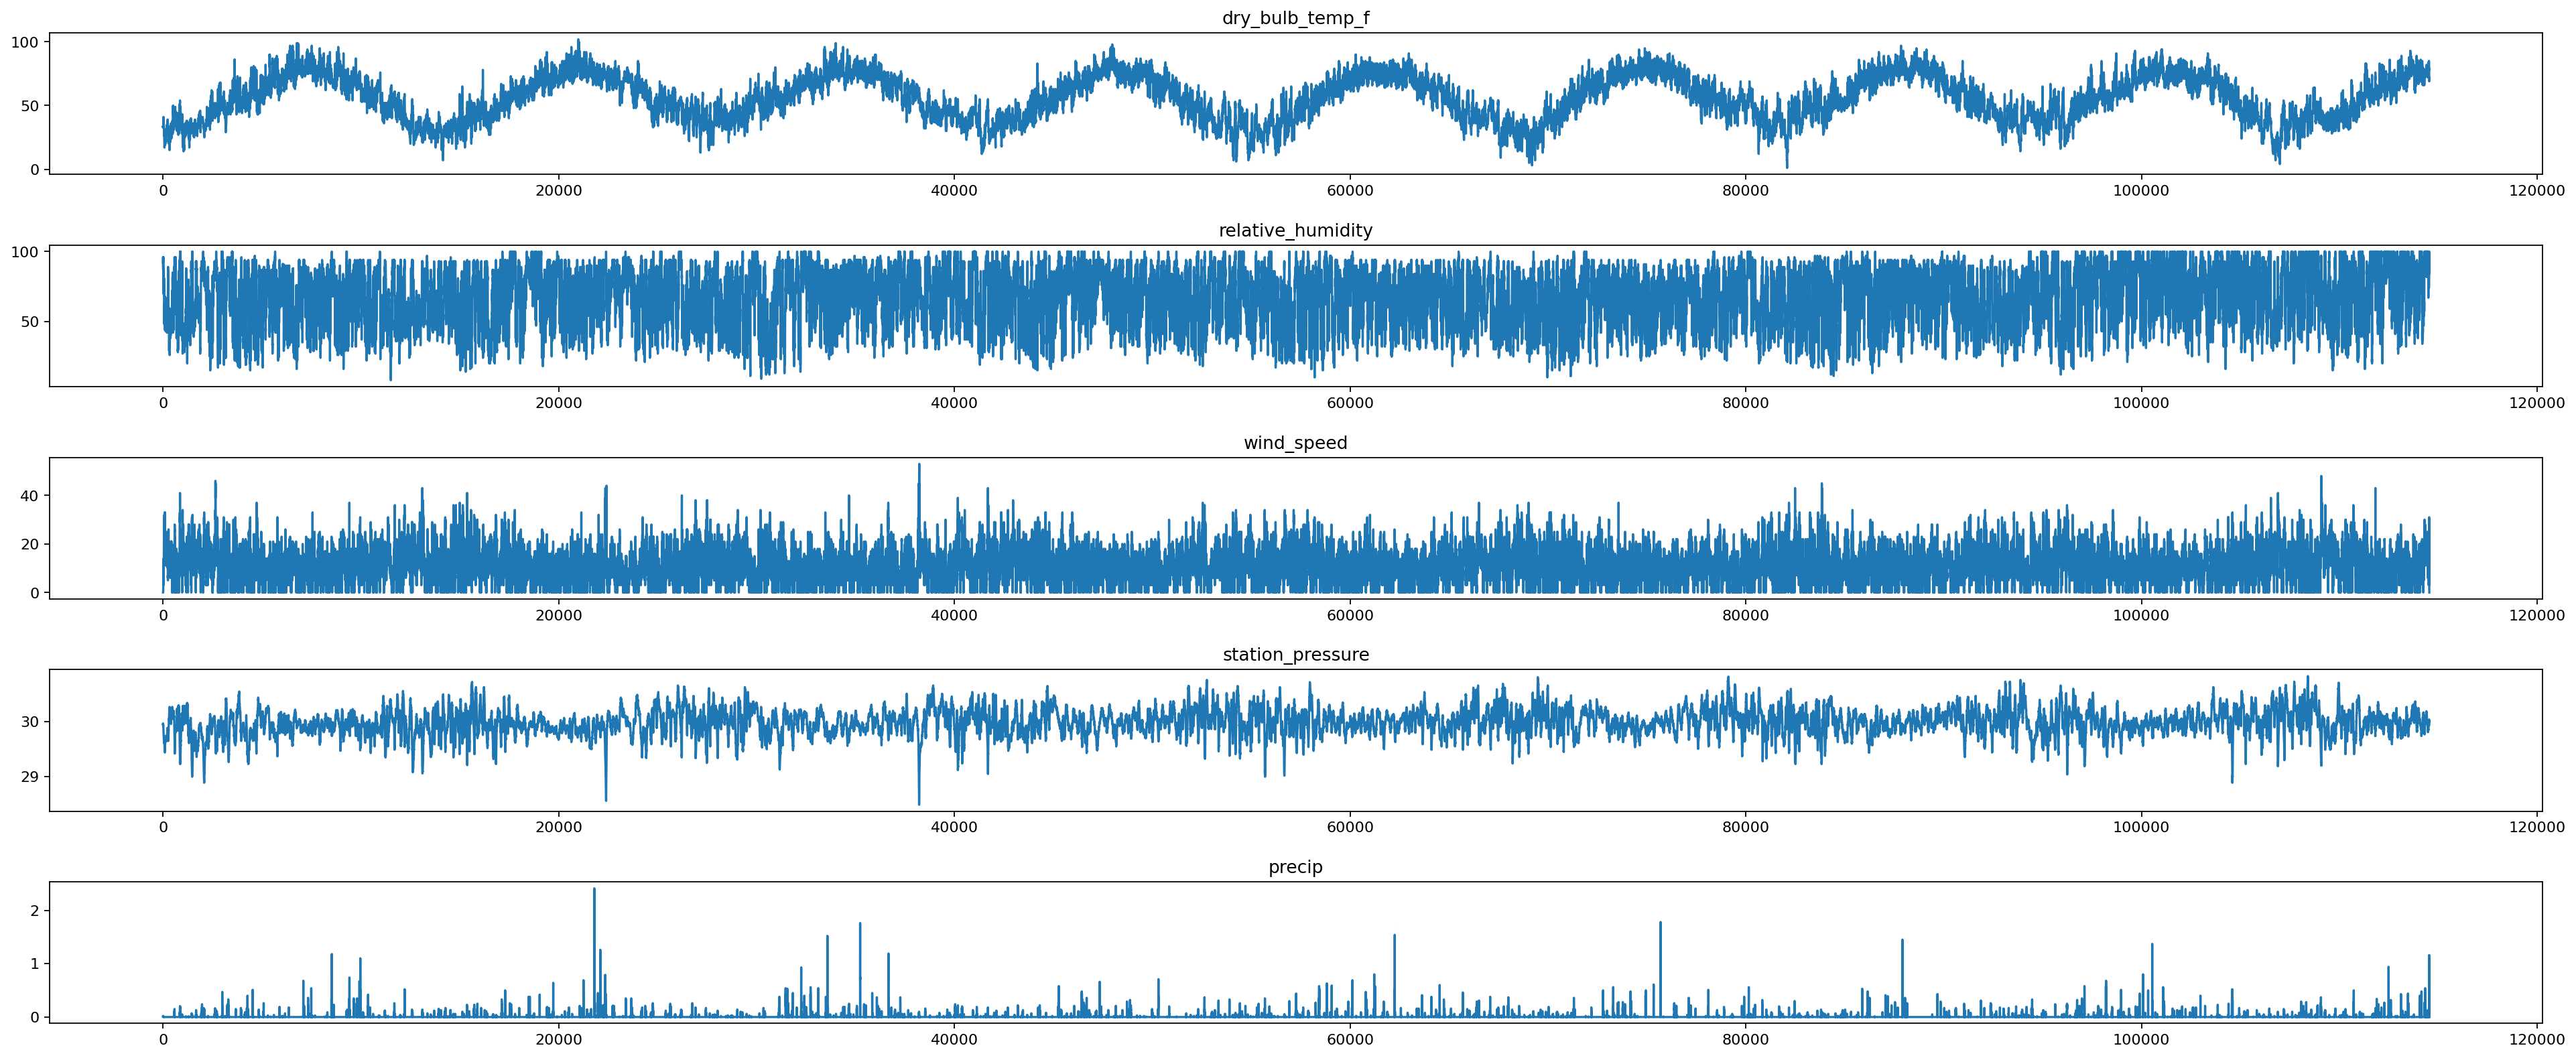

In [67]:
# Quick overview of columns
plt.figure(figsize=(30, 12))
i = 1
for col in plot_cols:
    plt.subplot(len(plot_cols), 1, i)
    plt.plot(data[col].values)
    plt.title(col)
    i += 1
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Feature Dependencies
Now we explore how the features (columns) of our data are related to each other. This helps in deciding which features to use when modelling a classifier or regresser. We ideally want independent features to be classified independently and likewise dependent features to be contributing to the same model.

We can see from the correlation plots how some features are somewhat correlated and could be used as additional data (perhaps for augmenting) when training a classifier.

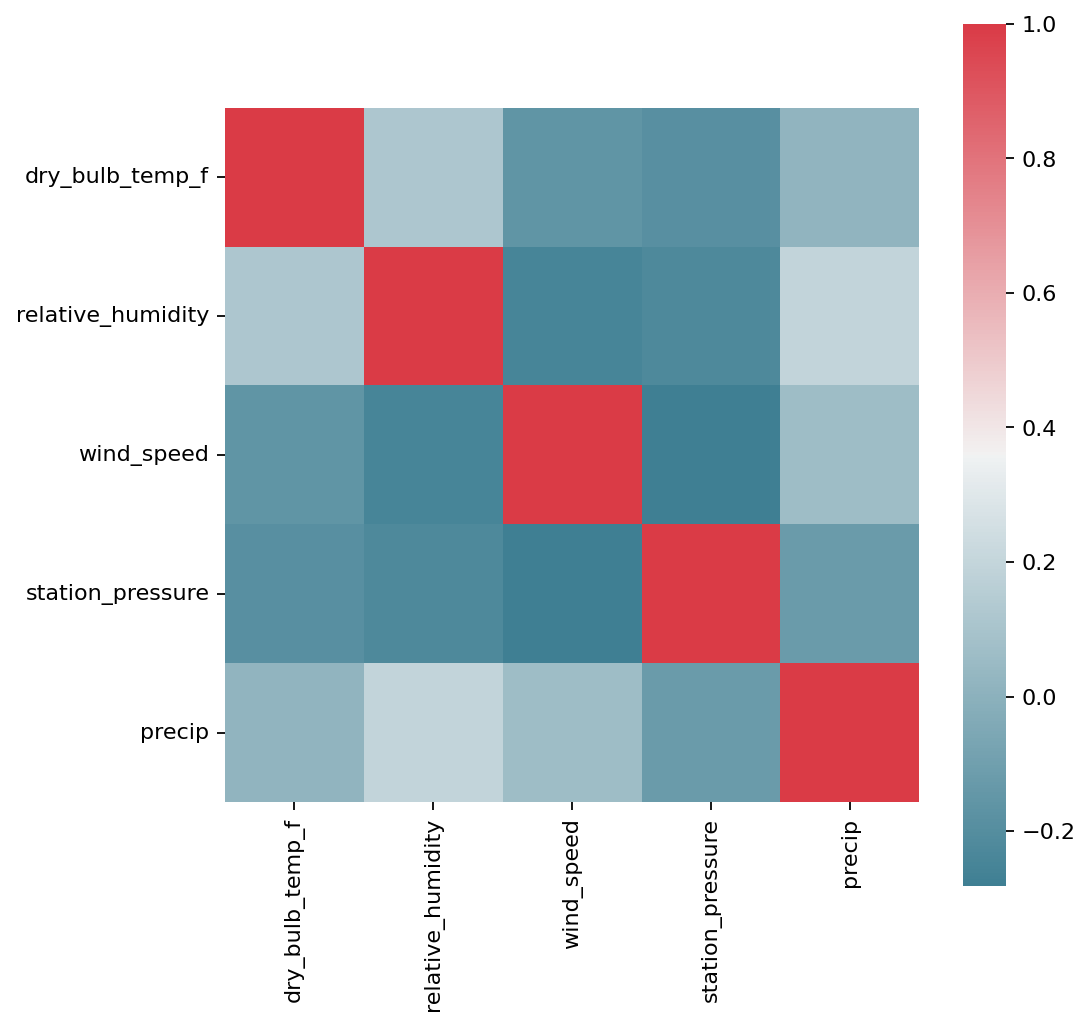

In [68]:
# Plot correlation matrix
f, ax = plt.subplots(figsize=(7, 7))
corr = data[plot_cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);

Additionally we also visualize the joint distrubitions in the form of pairplots/scatter plots to see (qualitatively) the way in which these features are related in more detail over just the correlation. They are essentially 2D joint distributions in the case of off-diagonal subplots and the histogram (an approximation to the probability distribution) in case of the diagonal subplots.

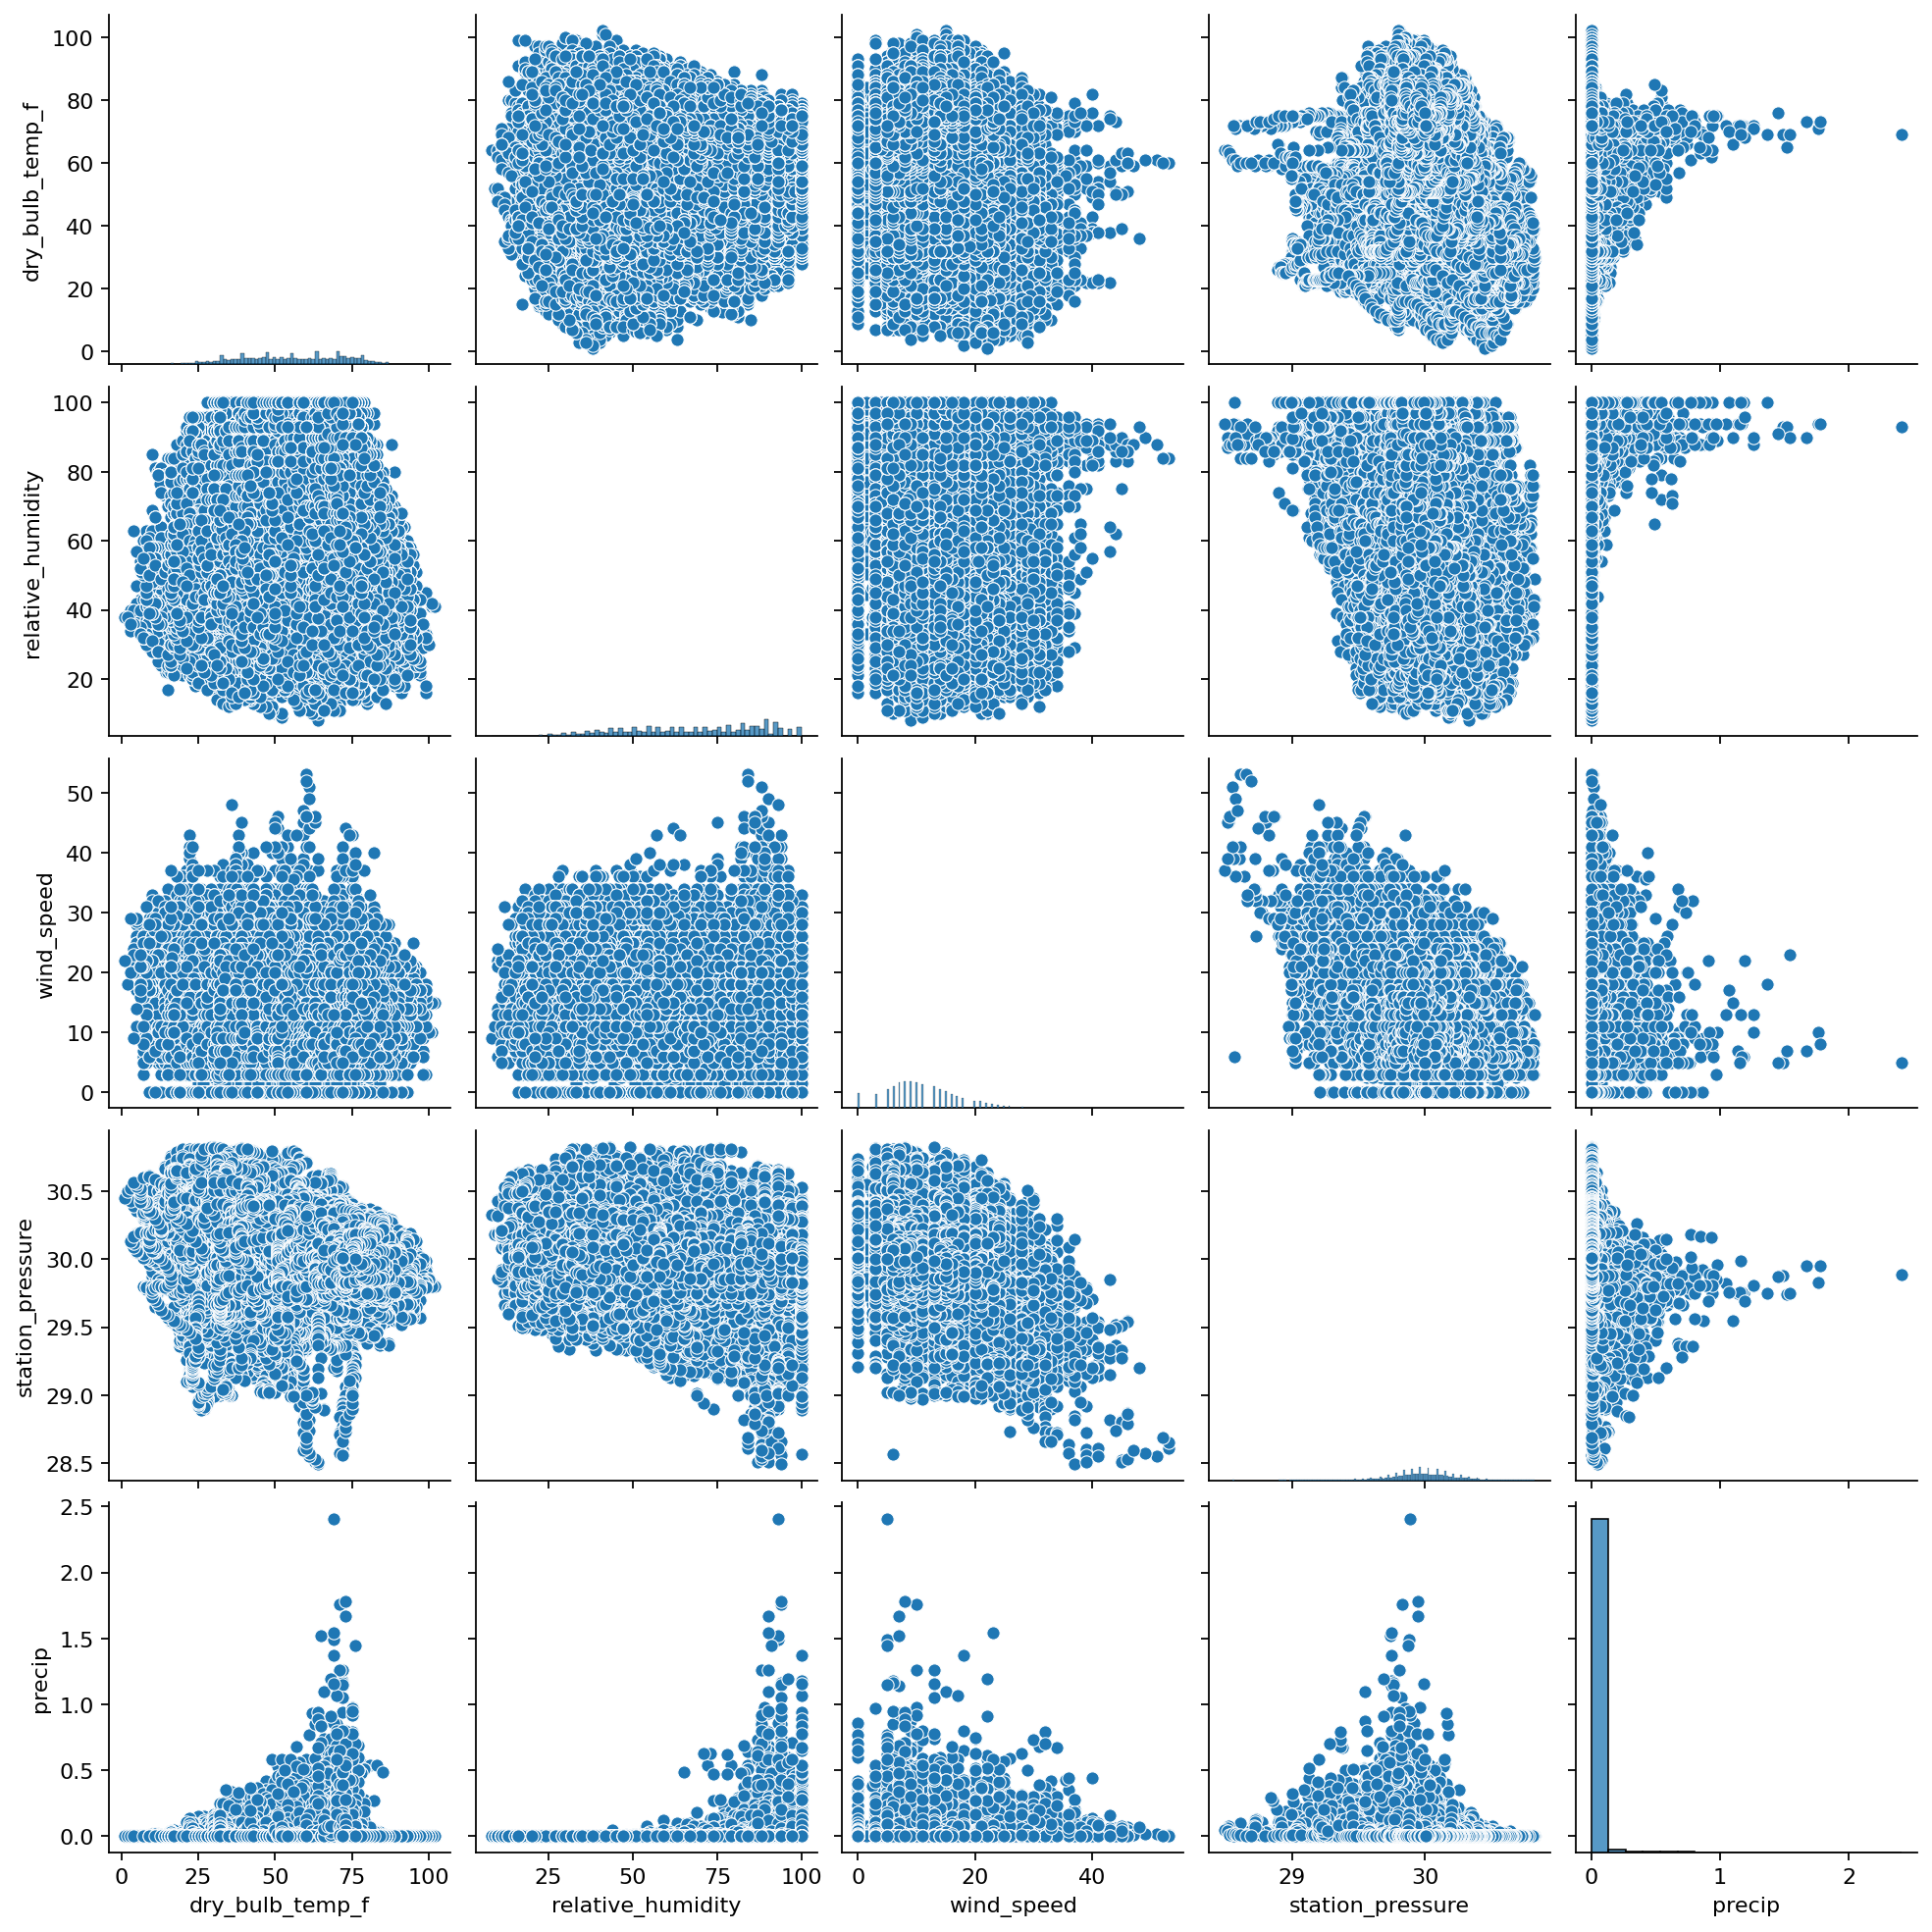

In [69]:
# Plot pairplots
sns.pairplot(data[plot_cols])

# Analyze Trends in the Data
Now that we have explored the whole dataset and the features on a high level, let us focus on one particular feature - dry_bulb_temp_f, the dry bulb temperature in degrees Fahrenheit. This is what we mean when we refer to "air temperature". This is the most common feature used in temperature prediction, and here we explore it in further detail.

We first start with plotting the data for all 9 years in monthly buckets then drill down to a single year to notice (qualitatively) the overall trend in the data. We can see from the plots that every year has roughly a sinousoidal nature to the temperature with some anomalies around 2013-2014. Upon further drilling down we see that each year's data is not the smooth sinousoid but rather a jagged and noisy one. But the overall trend still is a sinousoid.

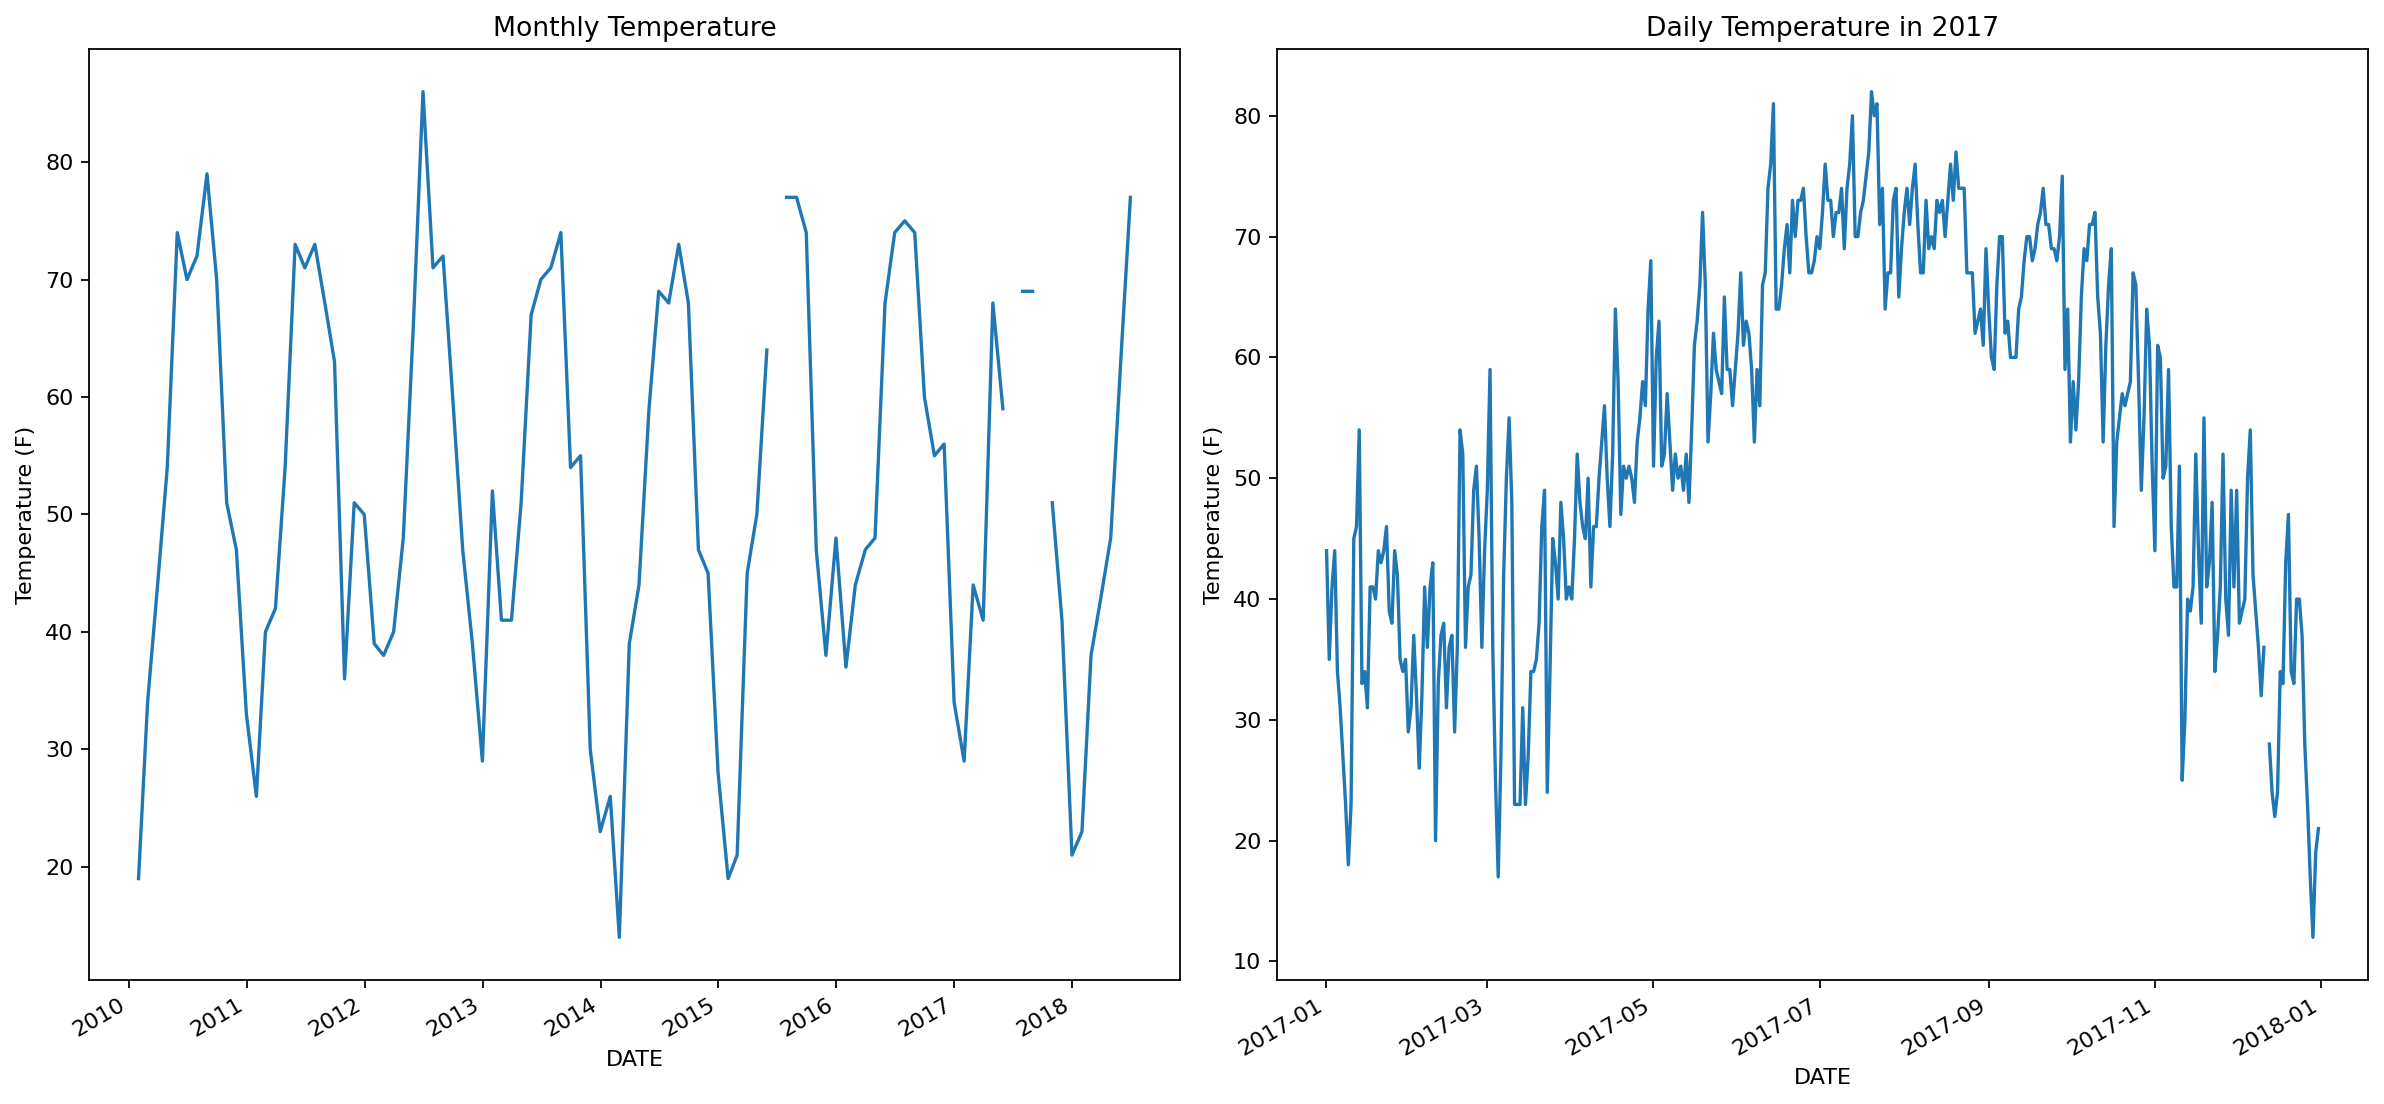

In [70]:
plt.figure(figsize=(15,7))

TEMP_COL = 'dry_bulb_temp_f'
# Plot temperature data converted to a monthly frequency 
plt.subplot(1, 2, 1)
#data = data[~data.index.duplicated(keep='first')]
data[TEMP_COL].asfreq('ME').plot()  
plt.title('Monthly Temperature')
plt.ylabel('Temperature (F)')

# Zoom in on a year and plot temperature data converted to a daily frequency 
plt.subplot(1, 2, 2)
data.loc['2017', TEMP_COL].asfreq('D').plot()
plt.title('Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

Next, we plot the change (delta) in temperature and notice that it is lowest around the middle of the year. That is expected behaviour as the gradient of the sinousoid near it's peak is zero.



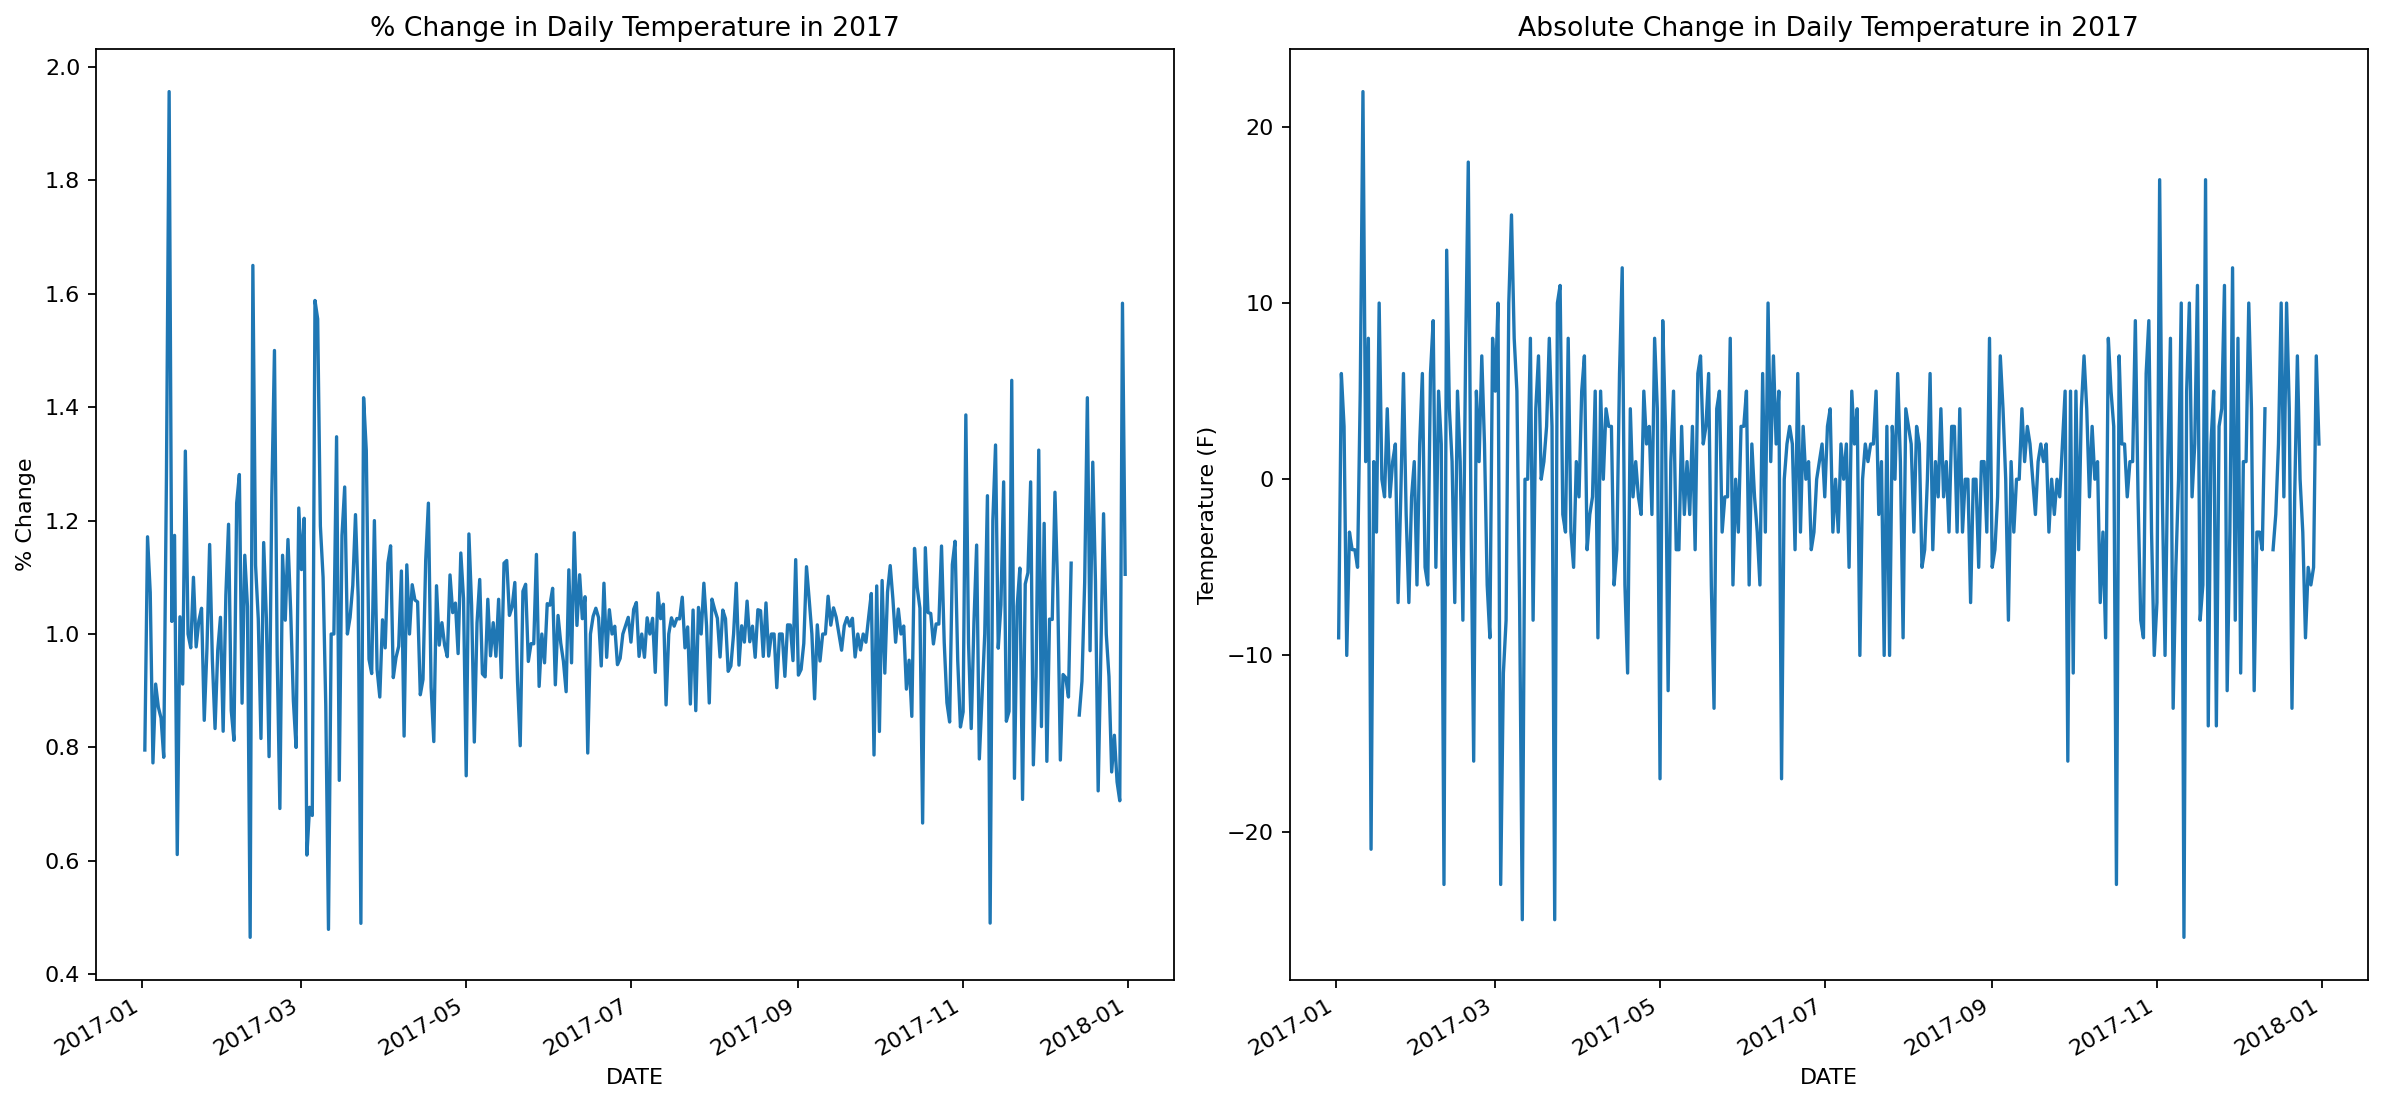

In [71]:
plt.figure(figsize=(15,7))

# Plot percent change of daily temperature in 2017
plt.subplot(1, 2, 1)
data.loc['2017', TEMP_COL].asfreq('D').div(
    data.loc['2017', TEMP_COL].asfreq('D').shift()
).plot()
plt.title('% Change in Daily Temperature in 2017')
plt.ylabel('% Change')

# Plot absolute change of temperature in 2017 with daily frequency
plt.subplot(1, 2, 2)

data.loc['2017', TEMP_COL].asfreq('D').diff().plot()

plt.title('Absolute Change in Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

Finally we apply some smoothing to the data in the form of a rolling/moving average. This is the simplest form of de-noising the data. As we can see from the plots, the average (plotted in blue) roughly traces the sinousoid and is now much smoother. This can improve the accuracy of a regression model trained to predict temperatures within a reasonable margin of error.

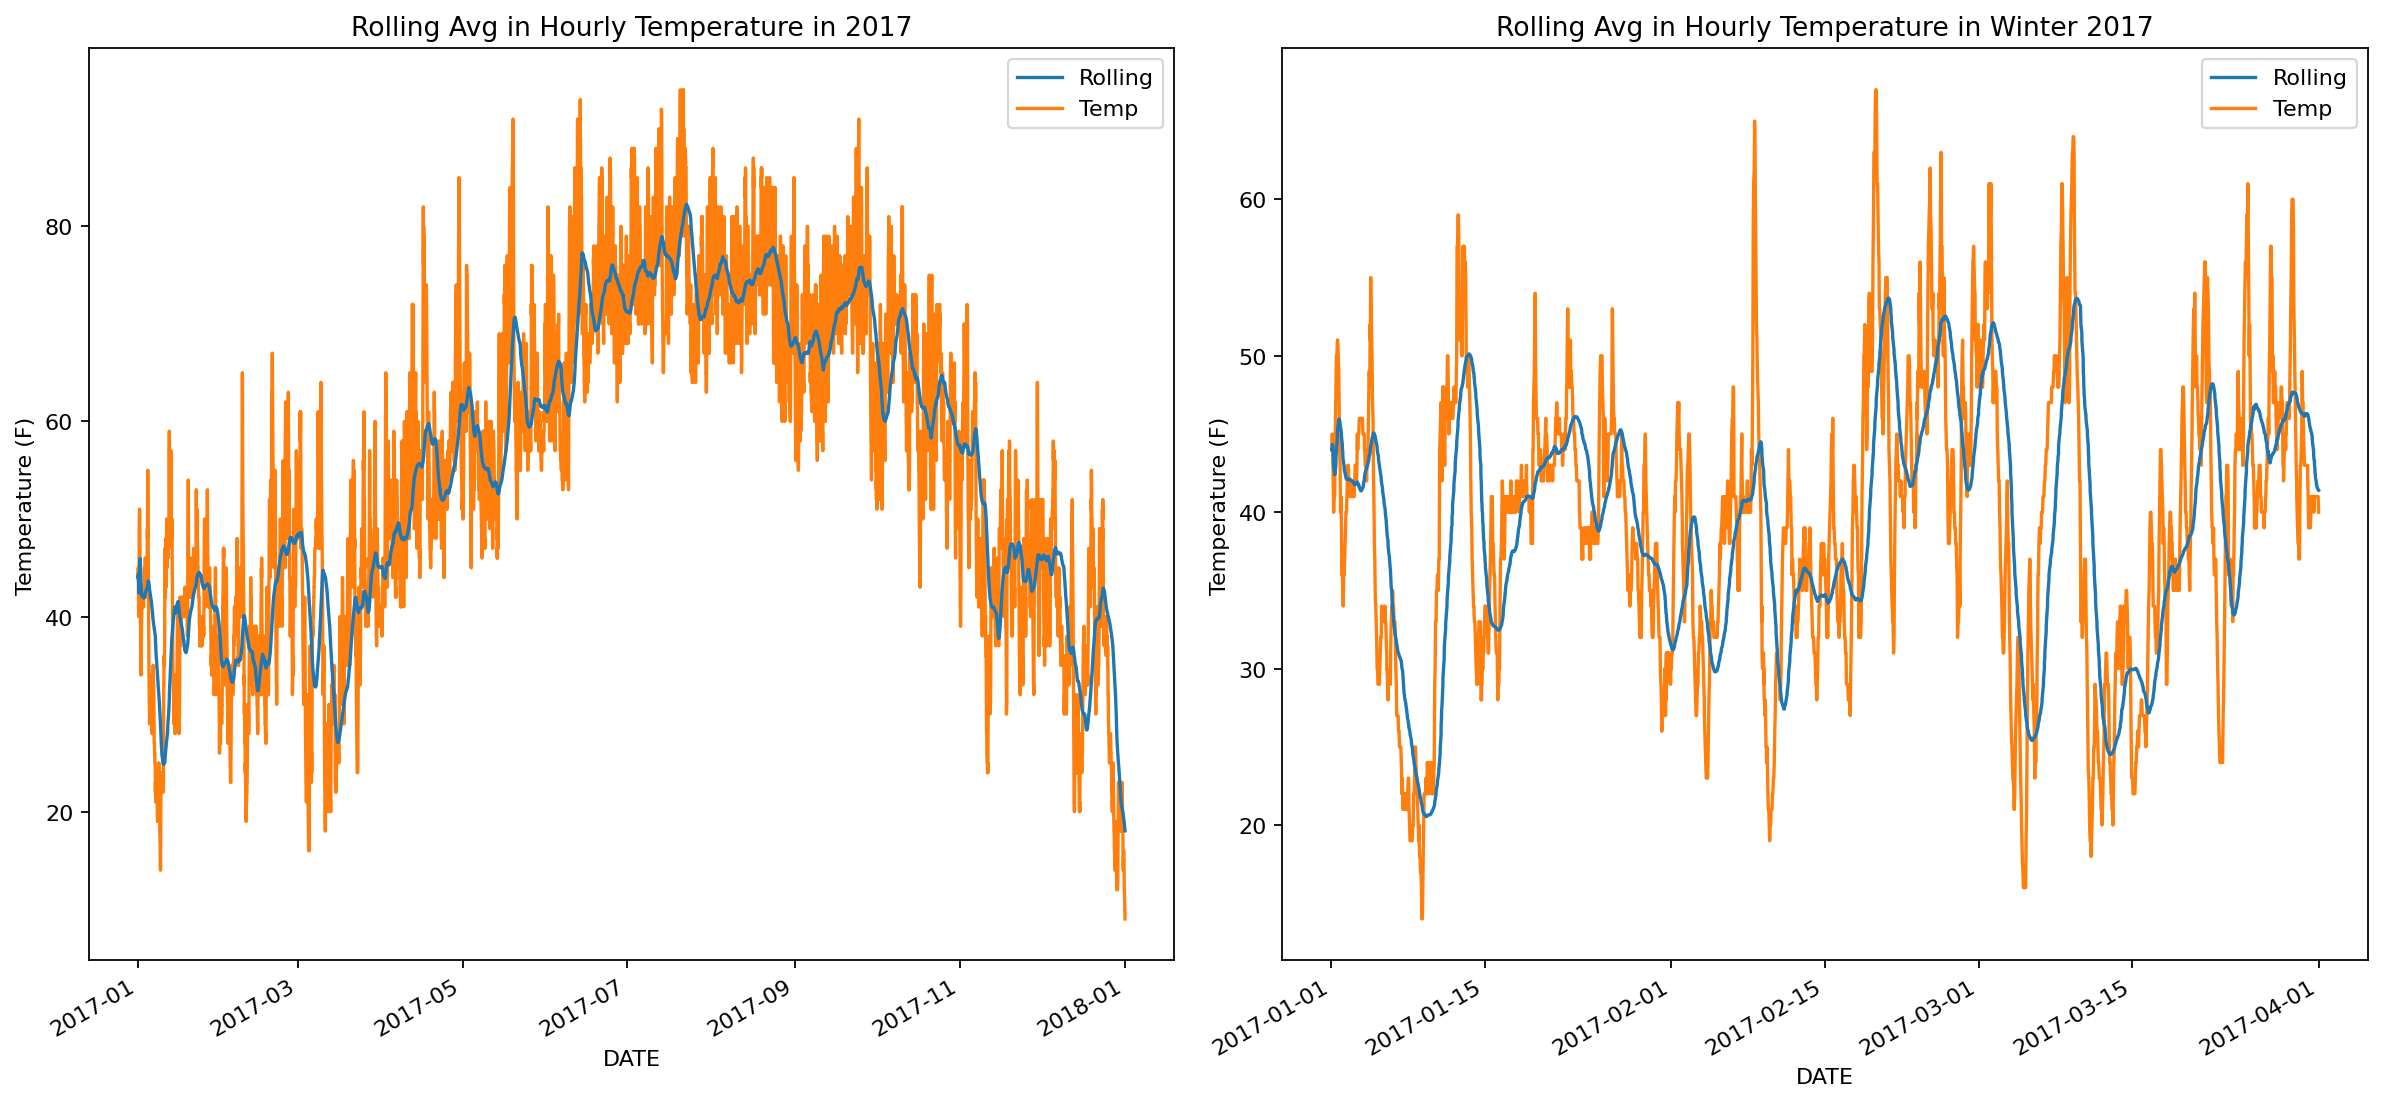

In [72]:
plt.figure(figsize=(15, 7))

# Plot rolling mean of temperature 
plt.subplot(1, 2, 1)
data.loc['2017', TEMP_COL].rolling('5D').mean().plot(zorder=2)  # 5-day rolling mean
data.loc['2017', TEMP_COL].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title('Rolling Avg in Hourly Temperature in 2017')
plt.ylabel('Temperature (F)')

# Plot rolling mean of temperature for Jan–Mar 2017
plt.subplot(1, 2, 2)
data.loc['2017-01':'2017-03', TEMP_COL].rolling('2D').mean().plot(zorder=2)  # 2-day rolling mean
data.loc['2017-01':'2017-03', TEMP_COL].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title('Rolling Avg in Hourly Temperature in Winter 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

# Part 3: Time Series Forecasting


In [73]:
%%capture
# Install required libraries
!pip install scikit-learn
!!pip install statsmodels

In [74]:
#Import required modules
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

For purposes of time-series modeling, we will restrict our analysis to a 2-year sample of the dataset to avoid overly long model-training times.



In [75]:
data.reset_index(inplace=True)
data['DATE'] = pd.to_datetime(data['DATE'])

# Step 2: Set 'DATE' as the index
data.set_index('DATE', inplace=True)

# Step 3: Now slice using date strings
sample = data['2016-01-01':'2018-01-01']
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26289 entries, 2016-01-01 00:51:00 to 2018-01-01 23:59:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visibility               26289 non-null  float64
 1   dry_bulb_temp_f          26289 non-null  float64
 2   wet_bulb_temp_f          26289 non-null  float64
 3   dew_point_temp_f         26289 non-null  float64
 4   relative_humidity        26289 non-null  float64
 5   wind_speed               26289 non-null  float64
 6   station_pressure         26289 non-null  float64
 7   sea_level_pressure       26289 non-null  float64
 8   precip                   26289 non-null  float64
 9   altimeter_setting        26289 non-null  float64
 10  wind_direction_sin       26289 non-null  float64
 11  wind_direction_cos       26289 non-null  float64
 12  pressure_tendency_incr   26289 non-null  int64  
 13  pressure_tendency_decr   26289 non-null  

## Create Training/Validation/Test Splits
Before we attempt any time-series analysis and prediction, we should split the dataset into training, validation and test sets. We use a portion of the data for training, and a portion of future data for our validation and test sets.

If we instead trained a model on the full dataset, the model would learn to be very good at making predictions on that particular dataset, essentially just copying the answers it knows. However, when presented with data the model has not seen , it would perform poorly since it has not learned how to generalize its answers.

By training on a portion of the dataset and testing the model's performance on another portion of the dataset (which data the model has not seen in training), we try to avoid our models "over-fitting" the dataset and make them better at predicting temperatures given unseen, future data. This process of splitting the dataset and evaluating a model's performance on the validation and test sets is commonly known as cross-validation).

By default here we use 80% of the data for the training set and 10% each for validation and test sets.

In [76]:
def split_data(data, val_size=0.1, test_size=0.1):
    """
    Splits data to training, validation and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    nval = int(round(len(data) * (1 - test_size - val_size)))

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]
    
    return df_train, df_val, df_test


# Create data split
df_train, df_val, df_test = split_data(sample)

print('Total data size:      {} rows'.format(len(sample)))
print('Training set size:    {} rows'.format(len(df_train)))
print('Validation set size:  {} rows'.format(len(df_val)))
print('Test set size:        {} rows'.format(len(df_test)))

Total data size:      26289 rows
Training set size:    21031 rows
Validation set size:  2629 rows
Test set size:        2629 rows


## Explore Baseline Models
In this section, we'll create a few simple predictive models of temperature, using shifting and rolling averages. These will serve as a baseline against which we can compare more sophisticated models.

Using values at recent timesteps (such as the most recent timestep t-1 and second-most recent timestep t-2) to predict the current value at time t is what's known as persistence modeling, or using the last observed value to predict the next following value. These preceding timesteps are often referred to in time-series analysis as lags. So, the value at time t-1 is known as the 1st lag and the value at time t-2 is the 2nd lag.

We can also create baselines based on rolling (or moving) averages. This is a time-series constructed by averaging each lagged value up to the selected lag. For example, a 6-period (or 6-lag) rolling avearge is the average of the previous 6 hourly lags t-6 to t-1.

Our baseline models will be:
- 1st lag - i.e. values at t-1
- 2nd lag - i.e. values at t-2
- 6-lag rolling average
- 12-lag rolling average
%

In [78]:
%%capture
# define the column containing the data we wish to model - in this case Dry Bulb Temperature (F)
Y_COL = 'dry_bulb_temp_f'

# Use shifting and rolling averages to predict Y_COL (t)
n_in = 2
n_out = 1
features = [Y_COL]
n_features = len(features)

# create the baseline on the entire sample dataset.
# we will evaluate the prediction error on the validation set
baseline = sample[[Y_COL]].loc[:]
baseline['{} (t-1)'.format(Y_COL)] = baseline[Y_COL].shift(1)
baseline['{} (t-2)'.format(Y_COL)] = baseline[Y_COL].shift(2)
baseline['{} (6hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('6H').mean()
baseline['{} (12hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('12H').mean()
baseline.dropna(inplace=True)
baseline.head(10)

Next, we will plot data from our validation dataset to get a sense for how well these baseline models predict the next hourly temperature. Note thatd we only use a few days of data in order to make the plot easier to view.



In [79]:
# plot first 7 days of the validation set, 168 hours 
start = df_val.index[0]
end = df_val.index[167]
sliced = baseline[start:end]

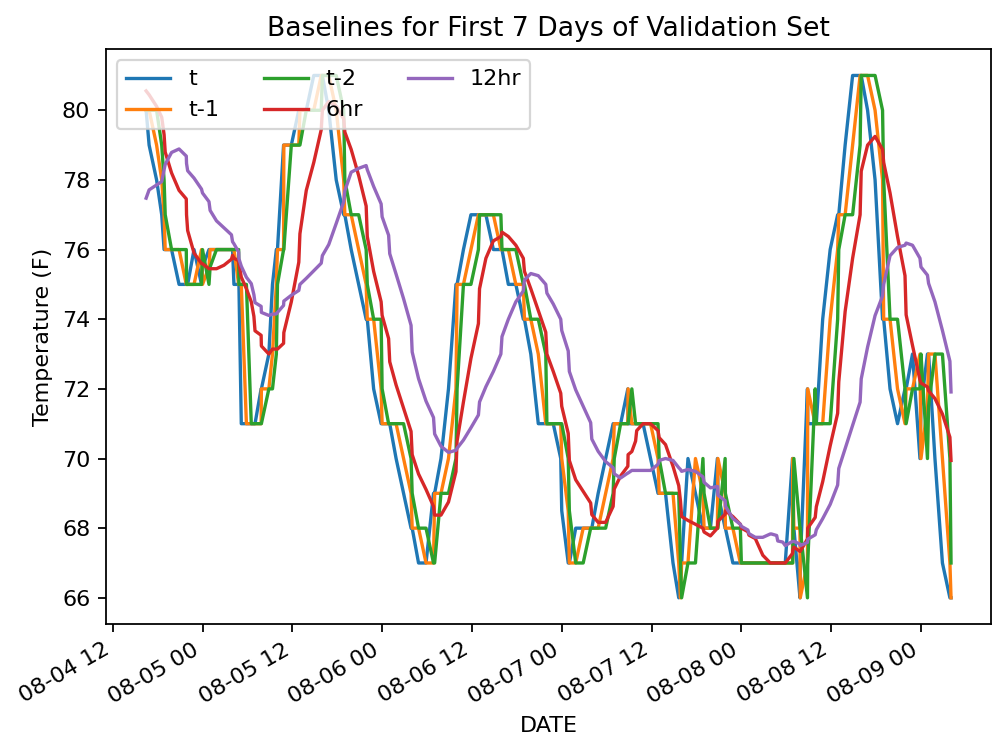

In [80]:
# Plot baseline predictions sample
cols = ['dry_bulb_temp_f', 'dry_bulb_temp_f (t-1)', 'dry_bulb_temp_f (t-2)', 'dry_bulb_temp_f (6hr rollavg)', 'dry_bulb_temp_f (12hr rollavg)']
sliced[cols].plot()

plt.legend(['t', 't-1', 't-2', '6hr', '12hr'], loc=2, ncol=3)
plt.title('Baselines for First 7 Days of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.rcParams['figure.dpi'] = 100
plt.show()

Evaluate baseline models As you can perhaps see from the graph above, the lagged baselines appear to do a better job of forecasting temperatures than the rolling average baselines.

In order to evaluate our baseline models more precisely, we need to answer the question "how well do our models predict future temperature?". In regression problems involving prediction of a numerical value, we often use a measure of the difference between our predicted value and the actual value. This is referred to as an error measure or error metric. A common measure is the Mean Squared Error (MSE):
MSE

This is the average of the squared differences between predicted values
and actual values
.

Because the MSE is in "units squared" it can be difficult to interpet, hence the Root Mean Squared Error (RMSE) is often used.

This is the square root of the MSE, and is in the same units as the values. We can compare the RMSE (and MSE) values for different models and say that the model that has the lower MSE is better at predicting temperatures, all things equal. Note that MSE and RMSE will grow large quickly if the differences between predicted and actual values are large. This may or may not be a desired quality of your error measure. In this case, it is probably a good thing, since a model that makes large mistakes in temperature prediction will be much less useful than one which makes small mistakes.

Next, we calculate the RMSE measure for each of our baseline models, on the full validation set.

In [81]:
# Calculating baseline RMSE
start_val = df_val.index[0]
end_val = df_val.index[-1]
baseline_val = baseline[start_val:end_val]

baseline_y = baseline_val[Y_COL]
baseline_t1 = baseline_val['dry_bulb_temp_f (t-1)']
baseline_t2 = baseline_val['dry_bulb_temp_f (t-2)']
baseline_avg6 = baseline_val['dry_bulb_temp_f (6hr rollavg)']
baseline_avg12 = baseline_val['dry_bulb_temp_f (12hr rollavg)']

rmse_t1 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t1)), 2)
rmse_t2 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t2)), 2)
rmse_avg6 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg6)), 2)
rmse_avg12 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg12)), 2)

print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))
print('Baseline t-2 RMSE:            {0:.3f}'.format(rmse_t2))
print('Baseline 6hr rollavg RMSE:    {0:.3f}'.format(rmse_avg6))
print('Baseline 12hr rollavg RMSE:   {0:.3f}'.format(rmse_avg12))

Baseline t-1 RMSE:            1.380
Baseline t-2 RMSE:            2.210
Baseline 6hr rollavg RMSE:    3.020
Baseline 12hr rollavg RMSE:   4.760


The RMSE results confirm what we saw in the graph above. It is clear that the rolling average baselines perform poorly. In fact, the t-2 lagged baseline is also not very good. It appears that the best baseline model is to simply use the current hour's temperature to predict the next hour's temperature!

Can we do better than this simple baseline using more sophisticated models?